## About Dataset
(WELFake) is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.

Dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Label (0 = fake and 1 = real).

There are 78098 data entries in csv file out of which only 72134 entries are accessed as per the data frame.

Download Dataset: 

```import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

print("Path to dataset files:", path)
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
import seaborn as sns

nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("./Datasets/WELFake_Dataset.csv")

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
df.isna().sum()

title    558
text      39
label      0
dtype: int64

In [8]:
df.fillna(' ', inplace=True)
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


<Axes: xlabel='label', ylabel='count'>

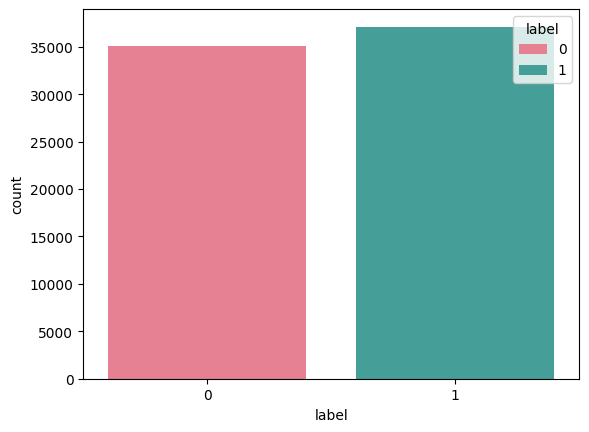

In [9]:
sns.countplot(data=df, x='label', palette='husl', hue='label')

In [10]:
df['title'] = df['title'].apply(lambda x:x.lower())

In [11]:
pattern = r'[^\w\s]'
df['text'] = df['text'].replace(pattern, '', regex=True)

In [12]:
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [13]:
df.head()

,title,text,label
0,law enforcement high alert following threats c...,No comment is expected from Barack Obama Membe...,1
1,,Did they post their votes for Hillary already,1
2,unbelievable! obama’s attorney general says ch...,Now most of the demonstrators gathered last n...,1
3,"bobby jindal, raised hindu, uses story christi...",A dozen politically active pastors came here f...,0
4,satan 2: russia unvelis image terrifying new ‘...,The RS28 Sarmat missile dubbed Satan 2 will re...,1


In [14]:
X = df['title'].values
y = df['label']
y.shape


(72134,)

In [15]:
preprocessor = TfidfVectorizer(lowercase=False)
preprocessor.fit_transform(X)
X = preprocessor.transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [18]:
def evaluate_model(y_true, y_pred):
    print(f"F1_score: {f1_score(y_true=y_true, y_pred=y_pred)}")
    print(f"Recall_score: {recall_score(y_true=y_true, y_pred=y_pred)}")
    print(f"Precision_score: {precision_score(y_true=y_true, y_pred=y_pred)}")
    print(f"Accuracy_score: {accuracy_score(y_true=y_true, y_pred=y_pred)}")

In [19]:
models = {
    "Logistic Regression" : LogisticRegression(verbose=1),
    "Decision Tree Classifier" : DecisionTreeClassifier(),
    "KNN Classifier" : KNeighborsClassifier(),
    "Support Vector Classifier": SVC(verbose=1),
    "Ada Boost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(verbose=1),
    "Random Forest Classifier": RandomForestClassifier(verbose=1)
}

In [20]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(list(models.keys())[i])
    evaluate_model(y_true=y_test, y_pred=y_pred_test)
    
    print('='*35)
    print('\n')
    

Logistic Regression
F1_score: 0.9043951666445359
Recall_score: 0.9178008354669182
Precision_score: 0.8913754744143437
Accuracy_score: 0.9001871490954461


Decision Tree Classifier
F1_score: 0.8784530386740331
Recall_score: 0.8784530386740331
Precision_score: 0.8784530386740331
Accuracy_score: 0.8749566784501283


KNN Classifier
F1_score: 0.6882688825959797
Recall_score: 0.9989219781700579
Precision_score: 0.525
Accuracy_score: 0.5345532681777223


[LibSVM]Support Vector Classifier
F1_score: 0.9205355358689136
Recall_score: 0.9311413556124511
Precision_score: 0.910168598524763
Accuracy_score: 0.9173078256047689


Ada Boost Classifier
F1_score: 0.7692062818336163
Recall_score: 0.9768225306562458
Precision_score: 0.6343747265248971
Accuracy_score: 0.6984820128924932


      Iter       Train Loss   Remaining Time 
         1           1.3414            2.22m
         2           1.3044            2.20m
         3           1.2732            2.17m
         4           1.2464            2.14

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s


Random Forest Classifier
F1_score: 0.9106701409768156
Recall_score: 0.9183398463818893
Precision_score: 0.9031274847601378
Accuracy_score: 0.9073265405143135




In [21]:
model_1 = LogisticRegression()

model_1.fit(X_train, y_train)

LogisticRegression()

In [28]:
model_1.predict(preprocessor.transform(["Scientists Discover Secret Portal to Another Dimension Under the Eiffel Tower!"]))

array([1])